# Introduction

This notebook is built to analyze and identify the factors that helped people to survive the horrible shipwreck.

We also would use ML techniques to predict if a person would survive or not!!

This notebook is inspired from [Titanic best working Classifier](https://www.kaggle.com/sinakhorami/titanic-best-working-classifier/data) and [Introduction to Ensembling/Stacking in Python](https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python)

 

# Table of contents
- [Data Information](#first-bullet)
- [Importing the packages needed](#second-bullet)
- [Load and prepare the data](#third-bullet)
- [Analyzing NaN/Null values](#fourth-bullet)
- [Analyzing the columns](#fifth-bullet)
- [Data Cleaning](#sixth-bullet)
- [One hot Encoding](#seventh-bullet)
- [Splitting into train and test features](#eighth-bullet)
- [Neural Network Architecture](#ninth-bullet)
- [Evaluating the model](#tenth-bullet)
- [Predicting the model](#eleventh-bullet)
- [Other Classification techniques](#twelfth-bullet)
- [Submission](#thirteenth-bullet)

## Data Infromation <a class="anchor" id="first-bullet"></a>
- Survival	0 = No, 1 = Yes
- pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
- sex	Male/Female	
- Age	Age in years	
- sibsp	# of siblings / spouses aboard the Titanic	
- parch	# of parents / children aboard the Titanic	
- ticket	Ticket number	
- fare	Passenger fare	
- cabin	Cabin number	
- embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


## Importing the packages needed <a class="anchor" id="second-bullet"></a>

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import tensorflow as tf
from math import pi

## Load and prepare the data <a class="anchor" id="third-bullet"></a>


In [2]:
train_data_path = 'train.csv'
test_data_path = "test.csv"

df = pd.read_csv(train_data_path)
test_df = pd.read_csv(test_data_path)
full_data = [df, test_df]


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Analyzing NaN/Null values <a class="anchor" id="fourth-bullet"></a>

- Find out how many NaN/Null values are present in the data set
- Remove them if they are a trival % 

In [6]:
def find_nan_percentage(df):
    total_row_count = df.shape[0]
    non_nan_row_count =  df.dropna().shape[0]
    nan_row_count = total_row_count - non_nan_row_count
    
    print("Total number of DATA rows", total_row_count)
    print("Total number of DATA rows that have NaN/Null values: ", nan_row_count)
    print("Total numver of DATA rows that doesn't have NaN/Null values", non_nan_row_count)
    
    #Draw a pie chart to represent the above values
    plt.figure(figsize=(8,6))
    labels = 'Fully filled Rows', 'NaN Rows'
    sizes = [non_nan_row_count, nan_row_count]
    colors = ['skyblue', 'yellowgreen']
    explode =(0.1, 0)
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', shadow=True, explode=explode)
    return (nan_row_count/total_row_count)*100


Total number of DATA rows 891
Total number of DATA rows that have NaN/Null values:  708
Total numver of DATA rows that doesn't have NaN/Null values 183
79.46% of the data have NaN values


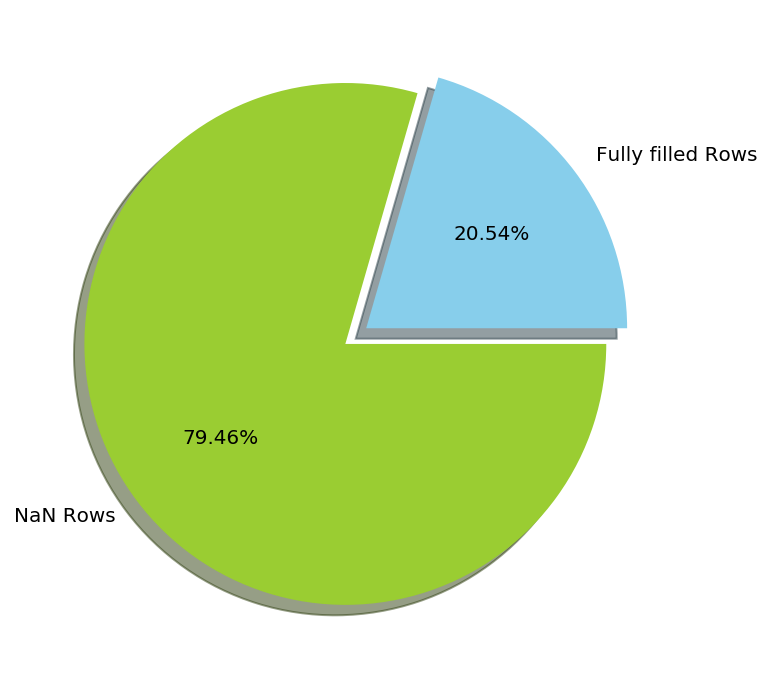

In [7]:
nan_percentage = find_nan_percentage(df)
print("{0:.2f}% of the data have NaN values".format(nan_percentage))

### Inference

- Around 80% of the rows aren't completely filled. So we can't omit all of them
- We need to further dive into the data and analyze more

## Analyzing the columns  <a class="anchor" id="fifth-bullet"></a>

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### 1. Pclass

Number of rows with NaN is:  0
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


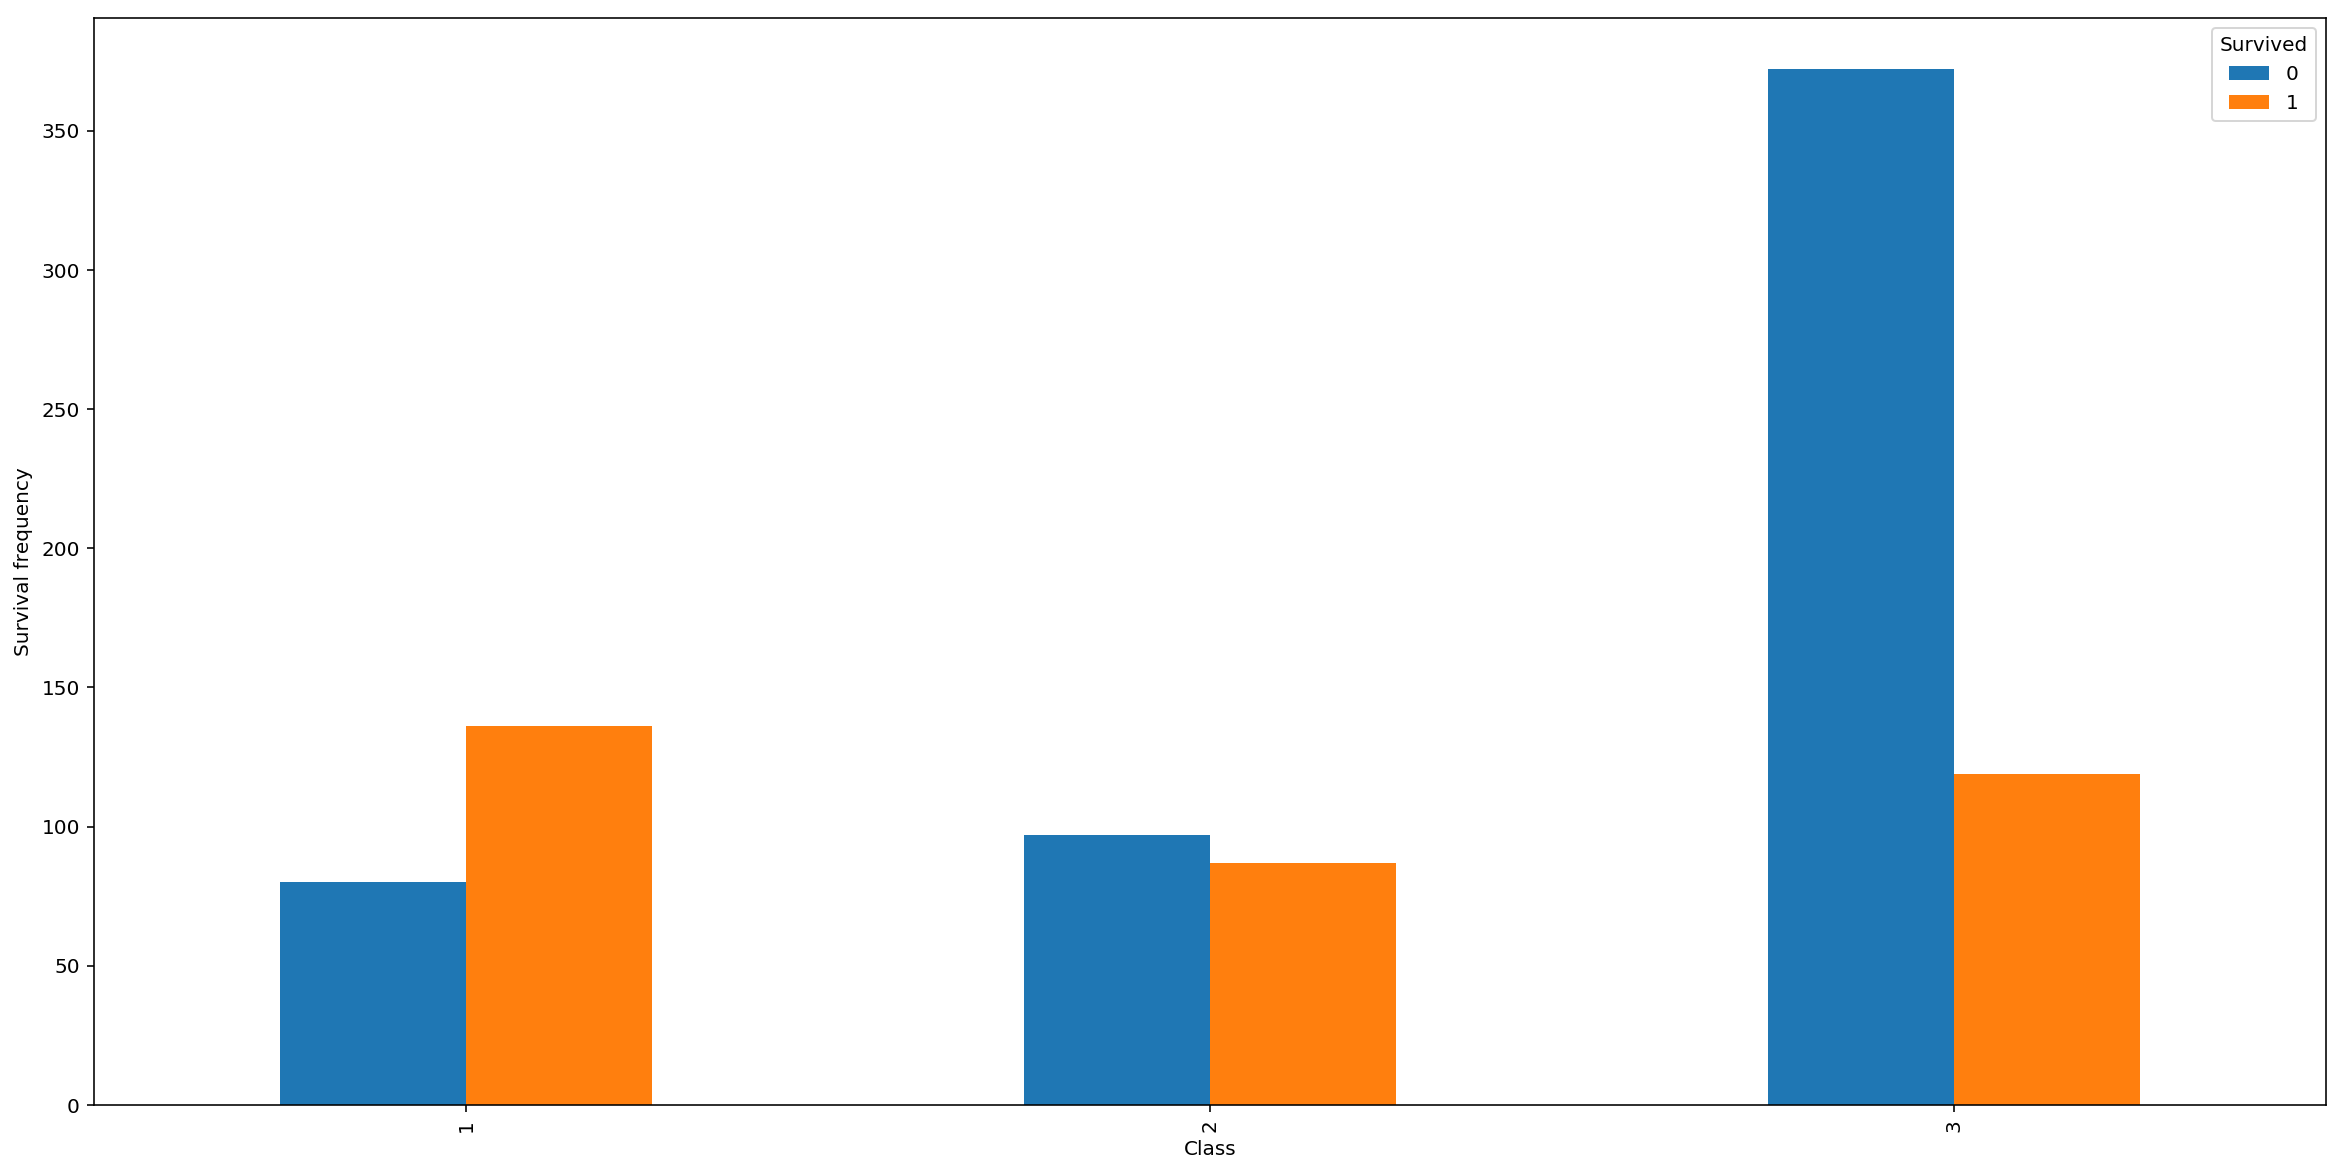

In [9]:
print("Number of rows with NaN is: ", df.Pclass.isna().sum())
pd.crosstab(df.Pclass, df.Survived).plot(kind='bar', figsize = (20,10))
plt.xlabel("Class")
plt.ylabel("Survival frequency")
print (df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())


### Inference
The higher the class, the higher the ratio of survival. It's quite clear

### 2.Sex

Number of rows with NaN is:  0
      Sex  Survived
0  female  0.742038
1    male  0.188908


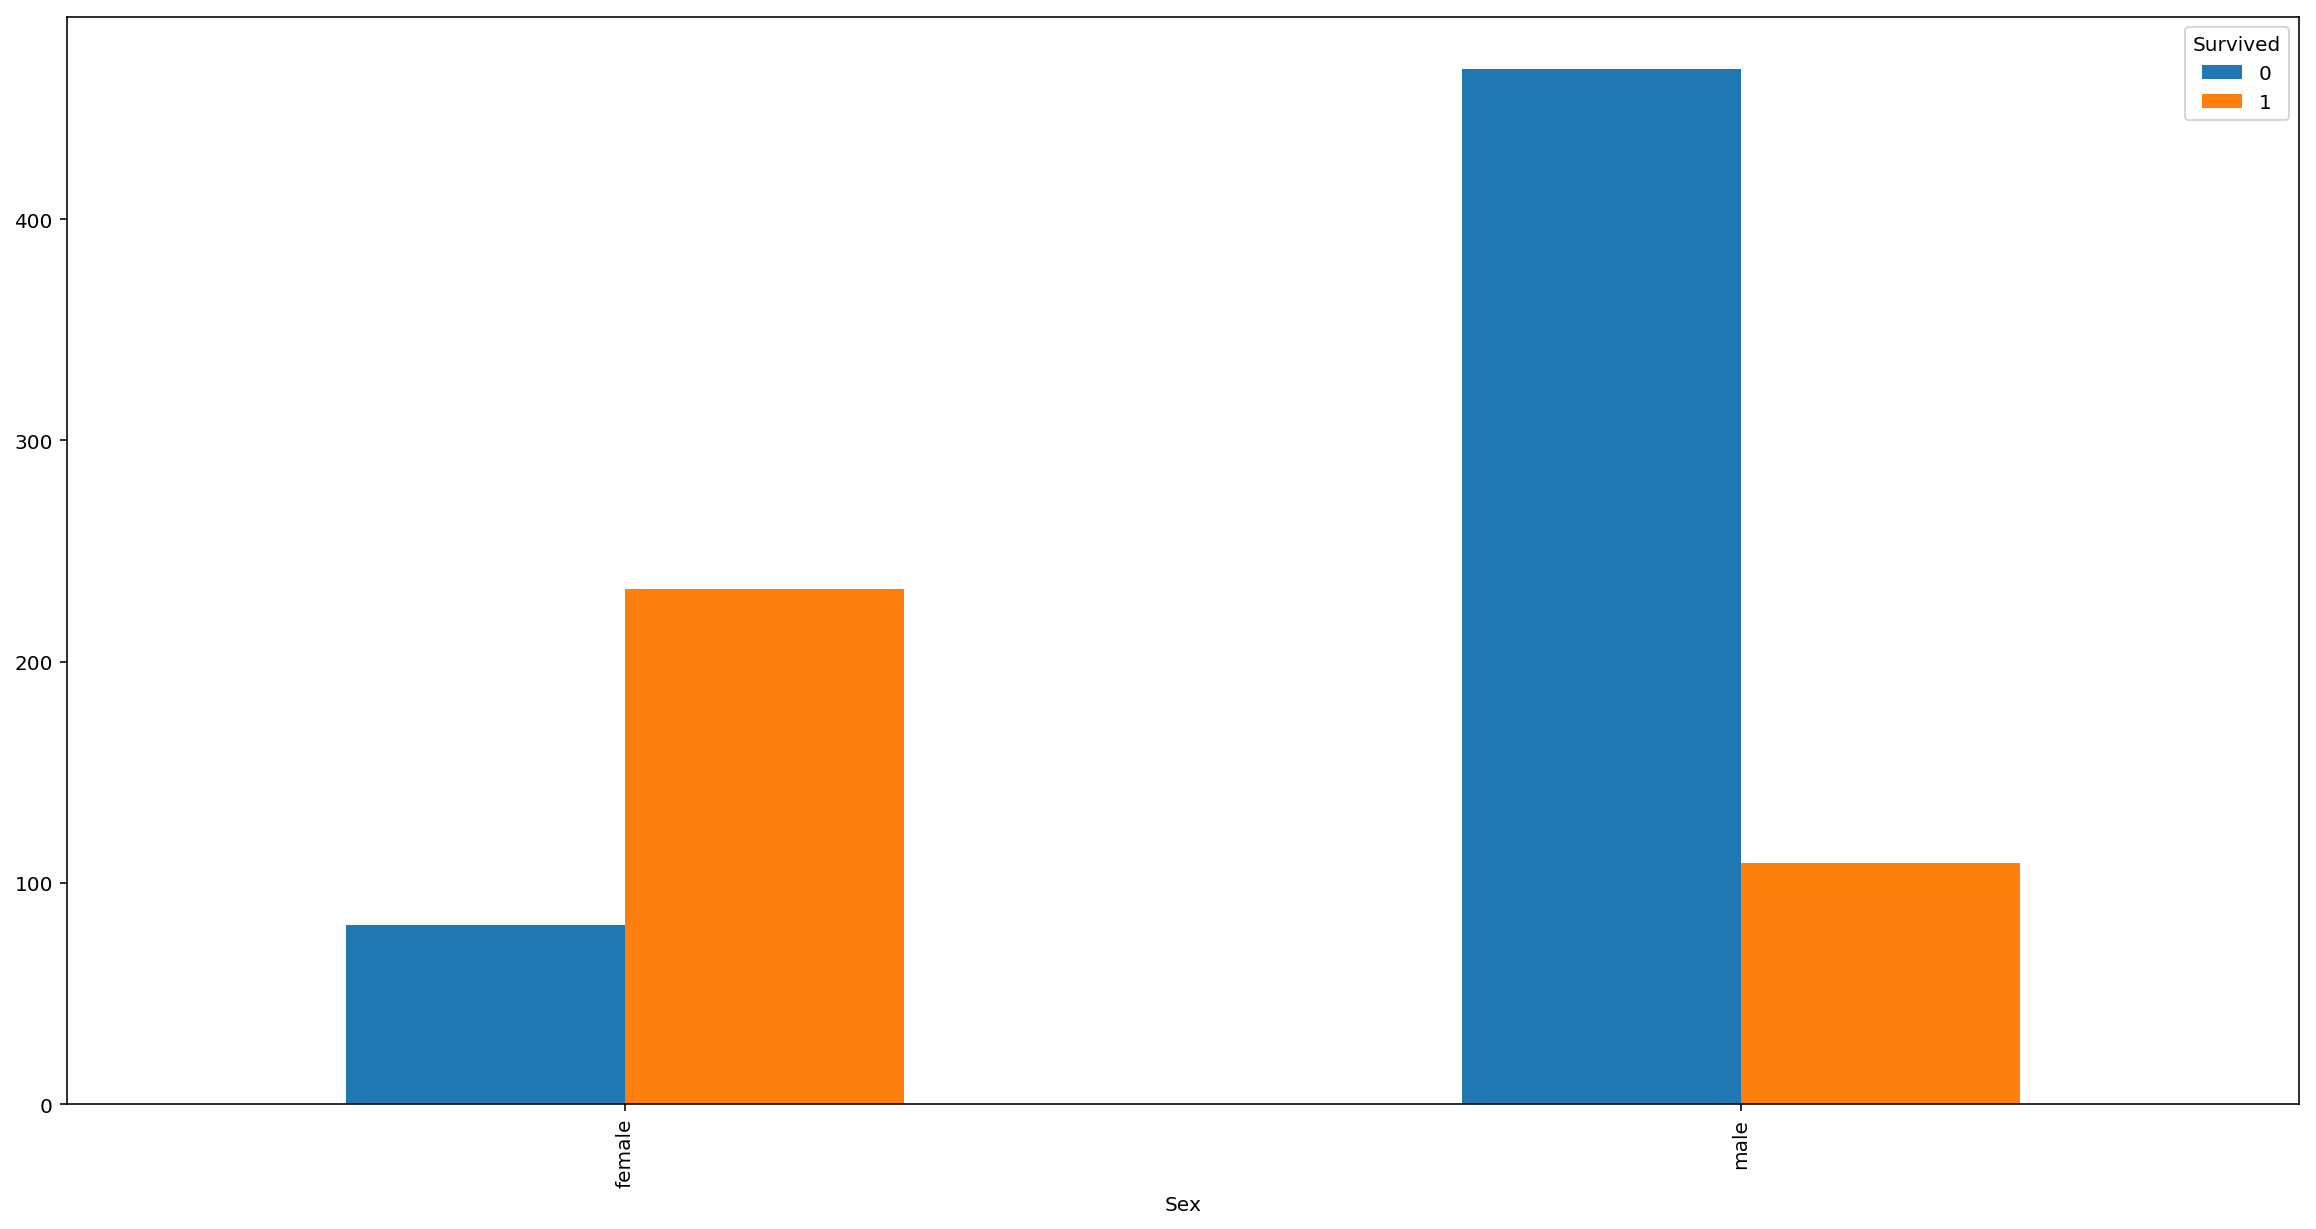

In [10]:
print("Number of rows with NaN is: ", df.Sex.isna().sum())
pd.crosstab(df.Sex, df.Survived).plot(kind='bar', figsize = (20,10))
print (df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean())

### Inference
Quite certain that females survived more than males

### 3. Total Family

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


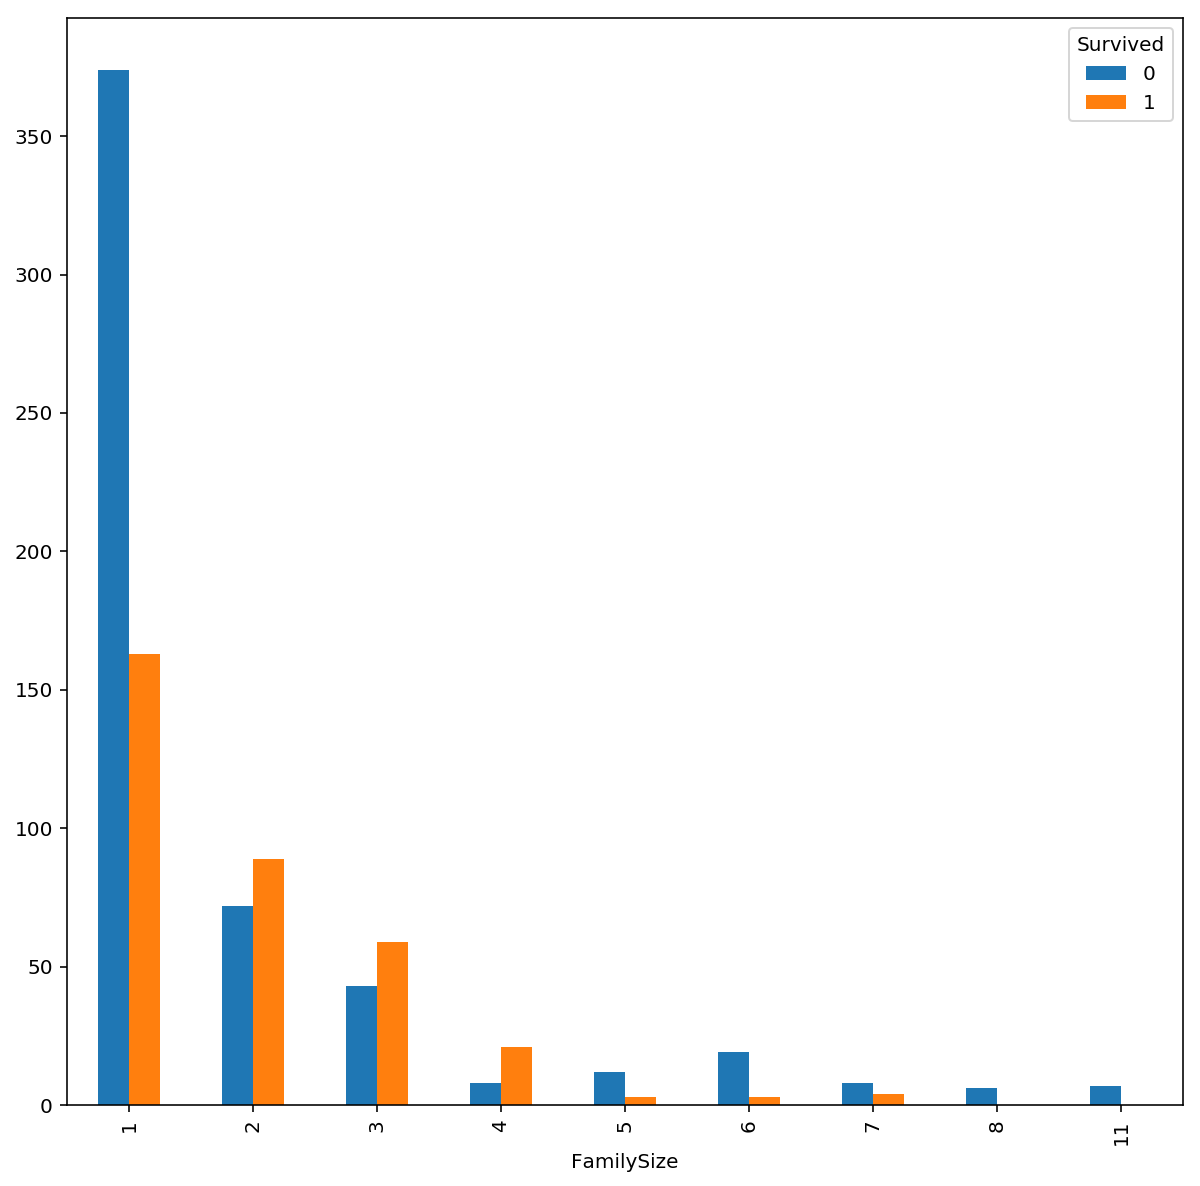

In [11]:
for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
print (df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())
pd.crosstab(df.FamilySize, df.Survived).plot(kind='bar', figsize=(10,10))

### Inference
This plot was made to check if families were saved or survived more than induviduals. It doesn't look like that

### 4. Name

#### - First, let us see how the names are listed

In [12]:
print("Number of rows with NaN is: ", df.Name.isna().sum())
df.Name.head(5)

Number of rows with NaN is:  0


0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

#### - We will get the title alone to see if they make any value

In [13]:
import re
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)

In [14]:
pd.crosstab(df['Title'], df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


#### - We coud generalize all the trivial titles to a common basket

In [15]:
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
    'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

print (df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())

    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826


### 5. Embarked

In [16]:
print("Number of rows with NaN is: ", df.Embarked.isna().sum())

Number of rows with NaN is:  2


In [17]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

#### We would replace the NaN values with the most common Embarked place -- S

In [18]:
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

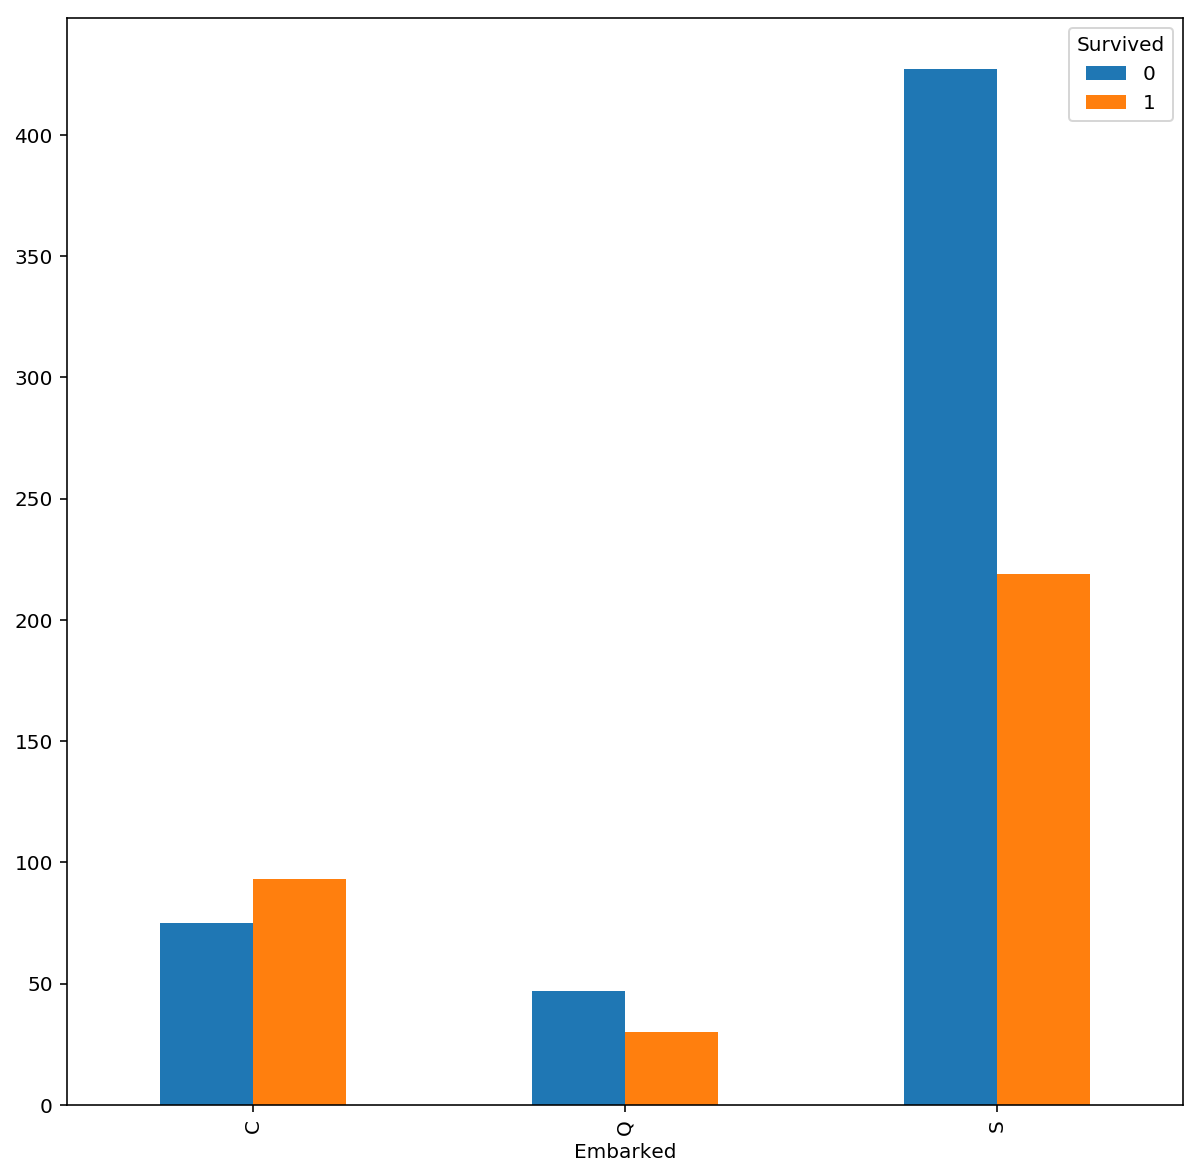

In [19]:
pd.crosstab(df.Embarked, df.Survived).plot(kind='bar', figsize=(10,10))

### Inference

People who started from Cherbourg survived more than people who started from anywehre else!!!

### 6. Fare

Number of rows with NaN is:  0


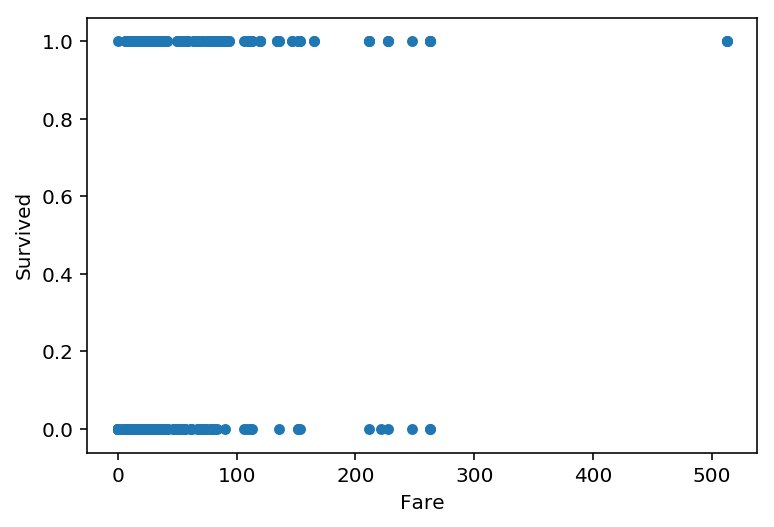

In [20]:
print("Number of rows with NaN is: ", df.Fare.isna().sum())
df.plot(kind='scatter', x='Fare', y='Survived')


### Inference
The scatter plot tells that fare doesn't make any influence on survival 

#### - Categorize the fare and check if it makes more sense

In [21]:
for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].fillna(df['Fare'].median())
df['CategoricalFare'] = pd.qcut(df['Fare'], 4)
print (df[['CategoricalFare', 'Survived']].groupby(['CategoricalFare'], as_index=False).mean())

   CategoricalFare  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


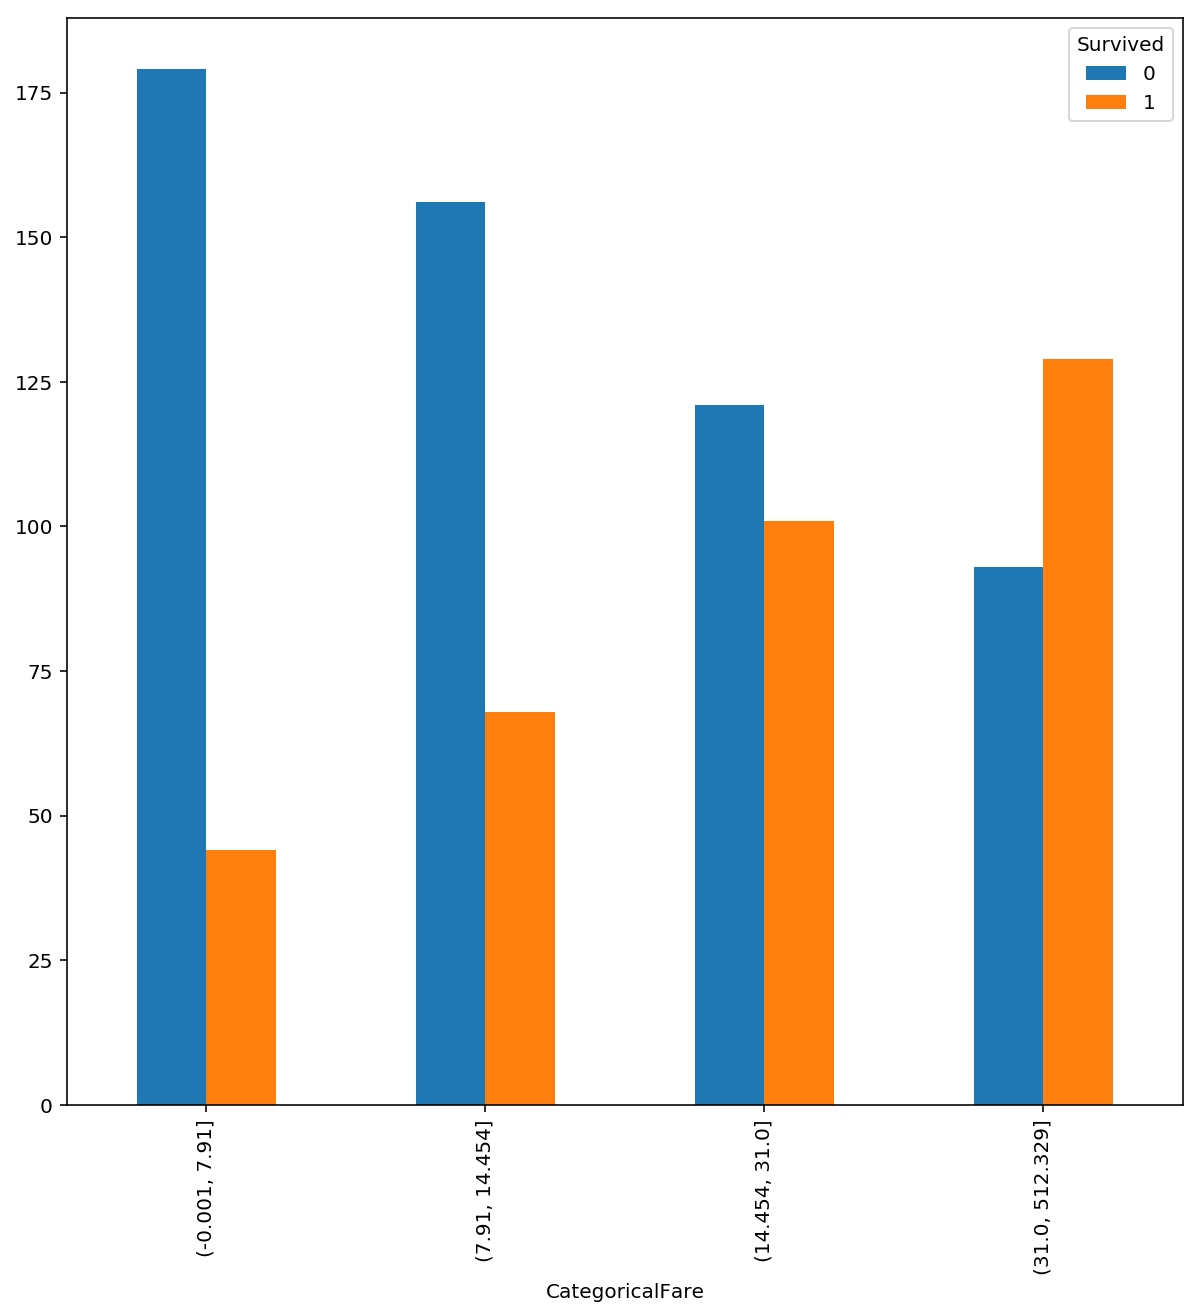

In [22]:
pd.crosstab(df.CategoricalFare,df.Survived).plot(kind='bar', figsize=(10,10))

### Interference
Higher the category, higher the survival rate!!!

### 7. Age

In [23]:
print("Number of rows with NaN is: ", df.Age.isna().sum())

Number of rows with NaN is:  177


- We have plenty of missing values in Age section
- We generate random numbers between (mean - std) and (mean + std)
- We then categorize the age in ranges

  CategoricalAge  Survived
0  (-0.08, 16.0]  0.542857
1   (16.0, 32.0]  0.363844
2   (32.0, 48.0]  0.353160
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


/Users/sganesh/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


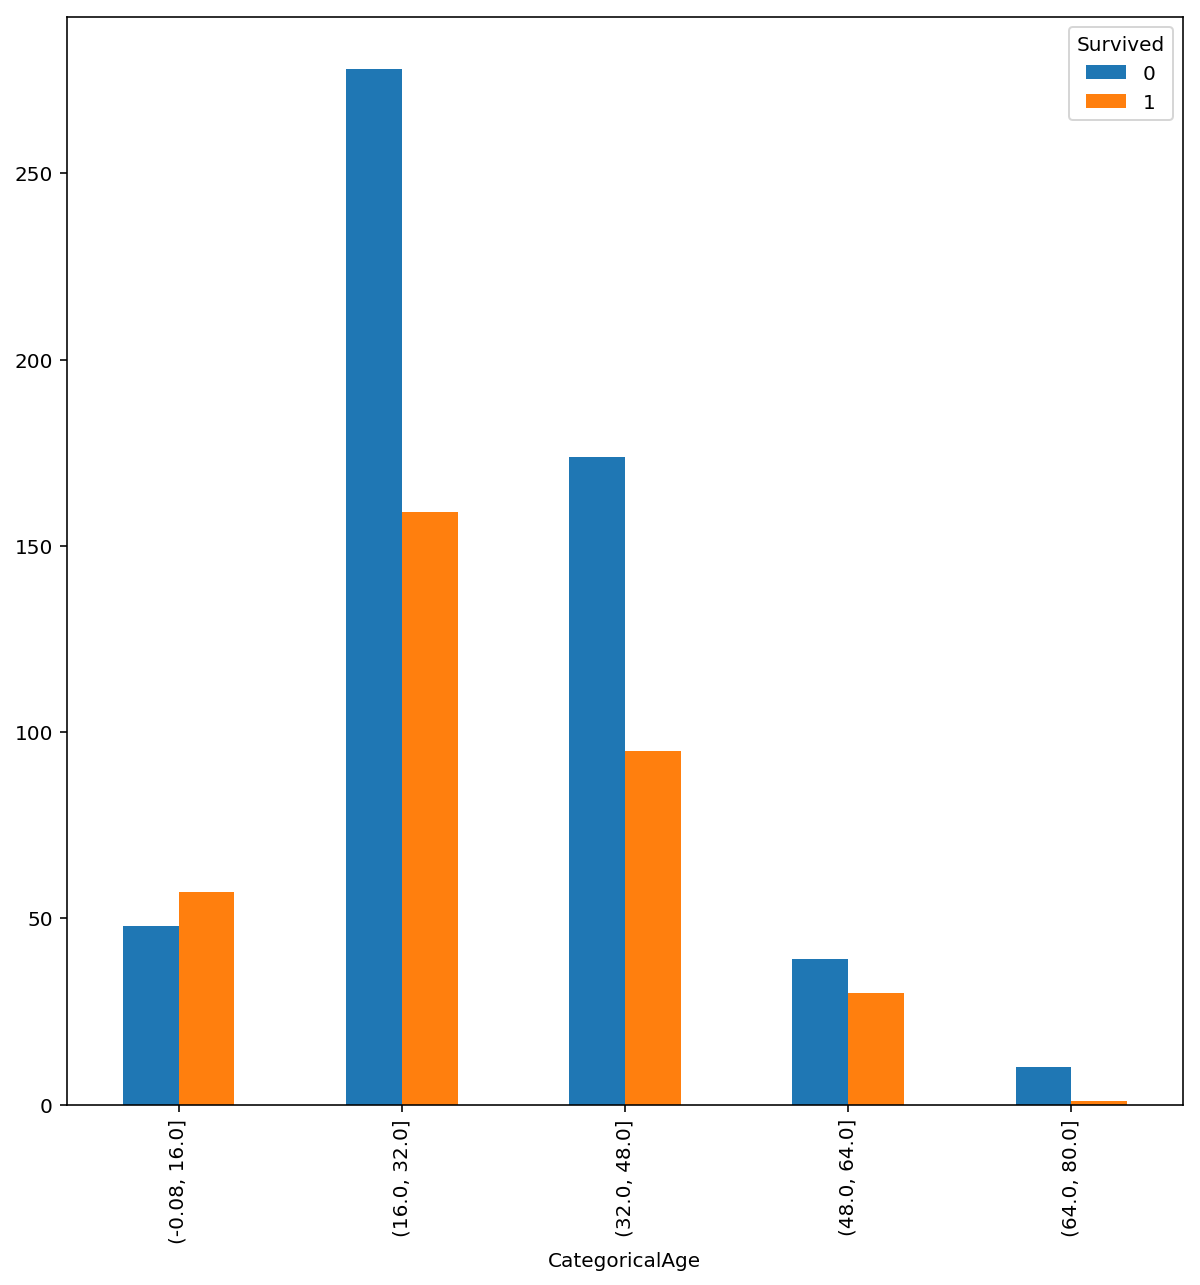

In [24]:
for dataset in full_data:
    age_avg        = dataset['Age'].mean()
    age_std        = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
    
df['CategoricalAge'] = pd.cut(df['Age'], 5)

print (df[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=False).mean())
pd.crosstab(df.CategoricalAge, df.Survived).plot(kind='bar', figsize=(10,10))

### Inference
The survival rate was certainly high for youngsters

## Data Cleaning  <a class="anchor" id="sixth-bullet"></a>

In [25]:
for dataset in full_data:
    # Mapping Sex
    name_map = {'female': 0, 'male': 1}
    dataset['Sex'] = dataset['Sex'].map(name_map).astype(int)
    
    # Mapping titles
    title_map = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_map)
    dataset['Title'] = dataset['Title'].fillna(0)
    
    # Mapping Embarked
    embarked_map = {'S': 0, 'C': 1, 'Q': 2}
    #dataset['Embarked'] = dataset['Embarked'].map(embarked_map).astype(int)
    dataset['Embarked'] = dataset['Embarked'].map(embarked_map).astype(int)
    
    # Mapping Fare
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare']  = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    # Mapping Age
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']                           = 4

In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title,CategoricalFare,CategoricalAge
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,A/5 21171,0,NaN,0,2,1,"(-0.001, 7.91]","(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,PC 17599,3,C85,1,2,3,"(31.0, 512.329]","(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,0,STON/O2. 3101282,1,NaN,0,1,2,"(7.91, 14.454]","(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,1,0,113803,3,C123,0,2,3,"(31.0, 512.329]","(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",1,2,0,0,373450,1,NaN,0,1,1,"(7.91, 14.454]","(32.0, 48.0]"


### Dropping the unnecessary columns

In [27]:
PassengerId = test_df['PassengerId']
columns_to_be_dropped = ['Name', 'PassengerId', 'SibSp', 'Parch', 'Ticket', 'Cabin', ]
df = df.drop(columns_to_be_dropped, axis=1)
df = df.drop(['CategoricalAge', 'CategoricalFare'], axis=1)
test_df = test_df.drop(columns_to_be_dropped, axis=1)

In [28]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title
0,0,3,1,1,0,0,2,1
1,1,1,0,2,3,1,2,3
2,1,3,0,1,1,0,1,2
3,1,1,0,2,3,0,2,3
4,0,3,1,2,1,0,1,1


In [29]:
test_df.head()

,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title
0,3,1,2,0,2,1,1
1,3,0,2,0,0,2,3
2,2,1,3,1,2,1,1
3,3,1,1,1,0,1,1
4,3,0,1,1,0,3,3


## One hot Encoding <a class="anchor" id="seventh-bullet"></a>

In [30]:

train_a = pd.get_dummies(df['Pclass'], prefix = "Pclass")
train_b = pd.get_dummies(df['Fare'], prefix = "Fare")
train_c = pd.get_dummies(df['Title'], prefix = "Title")
train_frames = [df, train_a, train_b, train_c]
df = pd.concat(train_frames, axis = 1)

test_a = pd.get_dummies(test_df['Pclass'], prefix = "Pclass")
test_b = pd.get_dummies(test_df['Fare'], prefix = "Fare")
test_c = pd.get_dummies(test_df['Title'], prefix = "Title")
test_frames = [test_df, test_a, test_b, test_c]
test_df = pd.concat(test_frames, axis = 1)

to_be_dropped = ['Pclass', 'Fare', 'Title']
df = df.drop(to_be_dropped, axis=1)
test_df = test_df.drop(to_be_dropped, axis=1)

In [31]:
df.head()

,Survived,Sex,Age,Embarked,FamilySize,Pclass_1,Pclass_2,Pclass_3,Fare_0,Fare_1,Fare_2,Fare_3,Title_1,Title_2,Title_3,Title_4,Title_5
0,0,1,1,0,2,0,0,1,1,0,0,0,1,0,0,0,0
1,1,0,2,1,2,1,0,0,0,0,0,1,0,0,1,0,0
2,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0
3,1,0,2,0,2,1,0,0,0,0,0,1,0,0,1,0,0
4,0,1,2,0,1,0,0,1,0,1,0,0,1,0,0,0,0


## Splitting into train and test features <a class="anchor" id="eighth-bullet"></a>

In [32]:
features = df.drop("Survived", axis=1)
targets = df.Survived.values

In [33]:
from sklearn.model_selection import train_test_split
train_features,test_features,train_targets,test_targets = train_test_split(features,targets,test_size = 0.20,random_state = 42)


## Neural network architecture  <a class="anchor" id="ninth-bullet"></a>
Finally we have prepared our data. Now it's time to train it with neural nets !!!

In [34]:
# Imports
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

# Building the model
model = Sequential()
model.add(Dense(64, input_shape=(train_features.shape[1],), activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(loss = 'mean_squared_error', optimizer='adam', metrics=['mse','mae'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                1088      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 3,201
Trainable params: 3,201
Non-trainable params: 0
_________________________________________________________________


Using TensorFlow backend.


In [35]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='test.model.best.hdf5', 
                               verbose=1, save_best_only=True)

history = model.fit(train_features, train_targets, validation_split=0.2, epochs=250, batch_size=32, verbose=0, callbacks=[checkpointer], shuffle=True)

#Load the Model with the Best Classification Accuracy on the Validation Set
model.load_weights('test.model.best.hdf5')


Epoch 00001: val_loss improved from inf to 0.19085, saving model to test.model.best.hdf5

Epoch 00002: val_loss improved from 0.19085 to 0.16640, saving model to test.model.best.hdf5

Epoch 00003: val_loss improved from 0.16640 to 0.14473, saving model to test.model.best.hdf5

Epoch 00004: val_loss improved from 0.14473 to 0.13205, saving model to test.model.best.hdf5

Epoch 00005: val_loss improved from 0.13205 to 0.12265, saving model to test.model.best.hdf5

Epoch 00006: val_loss improved from 0.12265 to 0.11740, saving model to test.model.best.hdf5

Epoch 00007: val_loss improved from 0.11740 to 0.11584, saving model to test.model.best.hdf5

Epoch 00008: val_loss improved from 0.11584 to 0.11443, saving model to test.model.best.hdf5

Epoch 00009: val_loss improved from 0.11443 to 0.11285, saving model to test.model.best.hdf5

Epoch 00010: val_loss improved from 0.11285 to 0.11200, saving model to test.model.best.hdf5

Epoch 00011: val_loss did not improve from 0.11200

Epoch 00012


Epoch 00152: val_loss did not improve from 0.11200

Epoch 00153: val_loss did not improve from 0.11200

Epoch 00154: val_loss did not improve from 0.11200

Epoch 00155: val_loss did not improve from 0.11200

Epoch 00156: val_loss did not improve from 0.11200

Epoch 00157: val_loss did not improve from 0.11200

Epoch 00158: val_loss did not improve from 0.11200

Epoch 00159: val_loss did not improve from 0.11200

Epoch 00160: val_loss did not improve from 0.11200

Epoch 00161: val_loss did not improve from 0.11200

Epoch 00162: val_loss did not improve from 0.11200

Epoch 00163: val_loss did not improve from 0.11200

Epoch 00164: val_loss did not improve from 0.11200

Epoch 00165: val_loss did not improve from 0.11200

Epoch 00166: val_loss did not improve from 0.11200

Epoch 00167: val_loss did not improve from 0.11200

Epoch 00168: val_loss did not improve from 0.11200

Epoch 00169: val_loss did not improve from 0.11200

Epoch 00170: val_loss did not improve from 0.11200

Epoch 00171

## Evaluating the model <a class="anchor" id="tenth-bullet"></a>

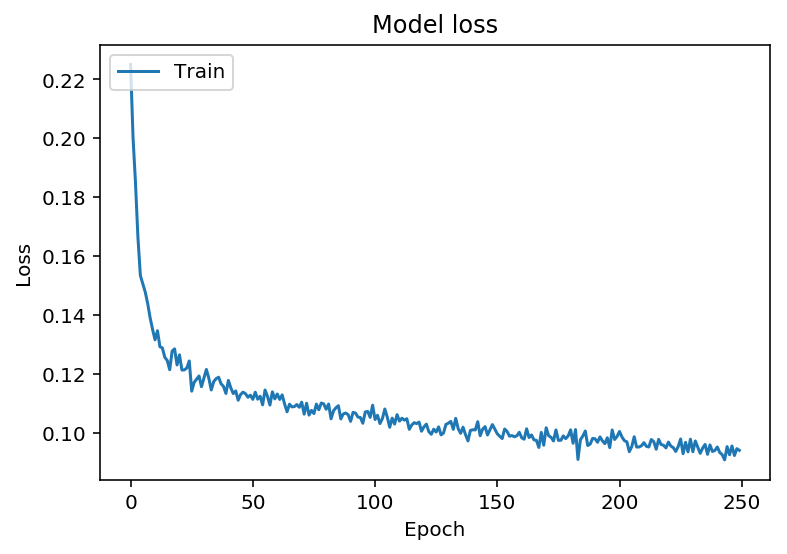

In [36]:
#print(vars(history))
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Predicting the model <a class="anchor" id="eleventh-bullet"></a>

(418,)
Accuracy:  0.937799043062201


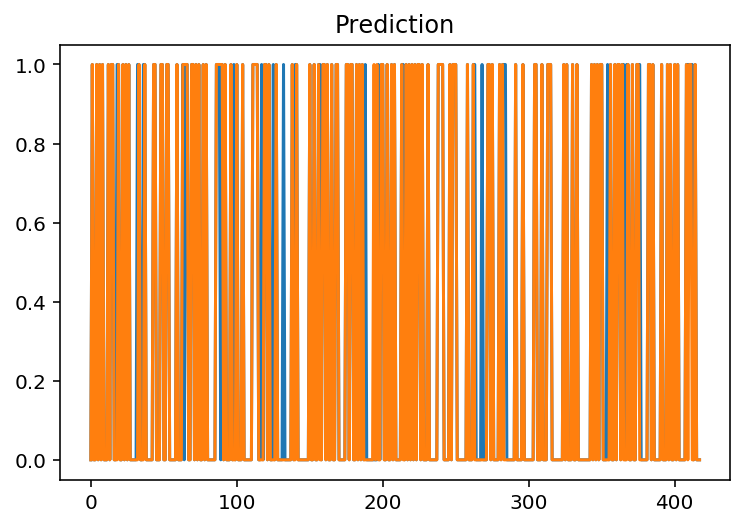

In [37]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score,mean_squared_error

y_pred = model.predict(test_df)
y_pred = y_pred.flatten()
print(y_pred.shape)
y_pred = np.where(y_pred<.5,0,1)

test_submission = "gender_submission.csv"
submission_df = pd.read_csv(test_submission)
submission_targets = submission_df['Survived'].values
plt.plot(submission_targets)
plt.plot(y_pred)
plt.title('Prediction')
print("Accuracy: ", accuracy_score(submission_targets,y_pred))


## Other Classification techniques <a class="anchor" id="twelfth-bullet"></a>

In [38]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier
from sklearn.ensemble import AdaBoostRegressor,AdaBoostClassifier
from sklearn.ensemble import ExtraTreesRegressor,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
import xgboost as xgb
from sklearn.svm import SVR,SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score,mean_squared_error

In [39]:
classifiers=[['Logistic Regression :',LogisticRegression()],
       ['Decision Tree Classification :',DecisionTreeClassifier()],
       ['Random Forest Classification :',RandomForestClassifier(n_estimators=30, max_features=7, max_depth=None, min_samples_split=2)],
       ['Gradient Boosting Classification :', GradientBoostingClassifier()],
       ['Ada Boosting Classification :',AdaBoostClassifier(n_estimators=100)],
       ['Extra Tree Classification :', ExtraTreesClassifier()],
       ['K-Neighbors Classification :',KNeighborsClassifier(n_neighbors=7)],
       ['Support Vector Classification :',SVC()],
       ['Gausian Naive Bayes :',GaussianNB()],
       ['XGBoost Classification :', xgb.XGBClassifier(objective="binary:logistic", random_state=42, n_estimators=20, al_metric=["auc", "error"])],]
cla_pred=[]
max_accuracy = float('-inf')
for index, (name,model) in enumerate(classifiers):
    model=model
    model.fit(train_features,train_targets)
    predictions = model.predict(test_features)
    cla_pred.append(accuracy_score(test_targets,predictions))
    accuracy_ = accuracy_score(test_targets,predictions)
    if accuracy_ > max_accuracy:
        max_index = index
    print(name, accuracy_)

/Users/sganesh/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sganesh/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Logistic Regression : 0.7932960893854749
Decision Tree Classification : 0.8324022346368715
Random Forest Classification : 0.8324022346368715
Gradient Boosting Classification : 0.8156424581005587
Ada Boosting Classification : 0.8212290502793296
Extra Tree Classification : 0.8156424581005587
K-Neighbors Classification : 0.8324022346368715
Support Vector Classification : 0.8268156424581006
Gausian Naive Bayes : 0.8044692737430168
XGBoost Classification : 0.8212290502793296


/Users/sganesh/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Text(0.5, 0, 'Accuracy')

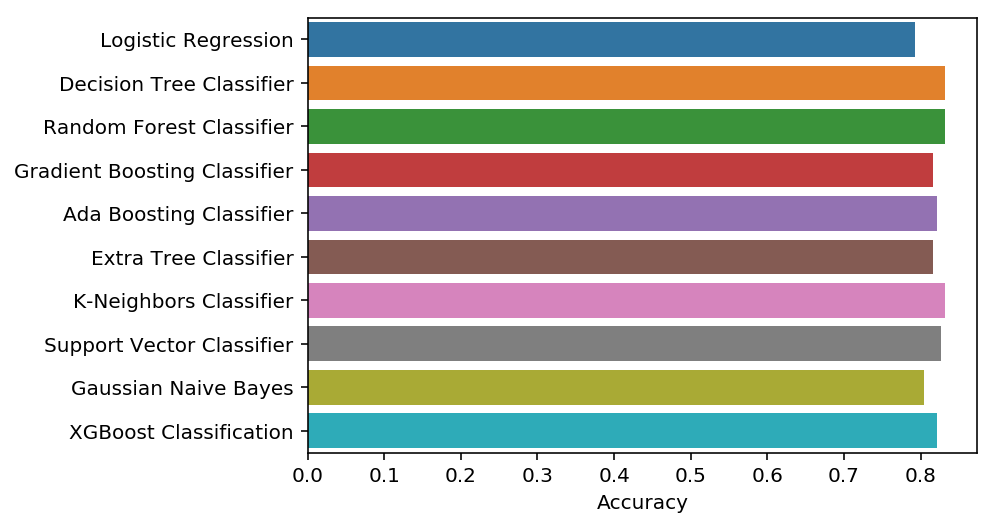

In [40]:
y_ax=['Logistic Regression' ,
      'Decision Tree Classifier',
      'Random Forest Classifier',
      'Gradient Boosting Classifier',
      'Ada Boosting Classifier',
      'Extra Tree Classifier' ,
      'K-Neighbors Classifier',
      'Support Vector Classifier',
      'Gaussian Naive Bayes',
      'XGBoost Classification']
x_ax=cla_pred
sns.barplot(x=x_ax,y=y_ax)
plt.xlabel('Accuracy')

(418,)
Accuracy:  0.9473684210526315


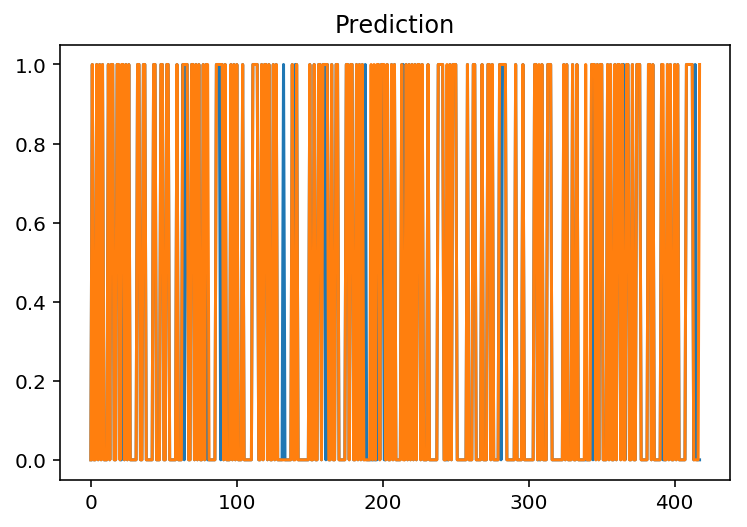

In [41]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score,mean_squared_error

y_pred = classifiers[max_index][1].predict(test_df)
y_pred = y_pred.flatten()
print(y_pred.shape)
y_pred = np.where(y_pred<.5,0,1)

test_submission = "gender_submission.csv"
submission_df = pd.read_csv(test_submission)
submission_targets = submission_df['Survived'].values
plt.plot(submission_targets)
plt.plot(y_pred)
plt.title('Prediction')
print("Accuracy: ", accuracy_score(submission_targets,y_pred))


# Submission <a class="anchor" id="thirteenth-bullet"></a>

In [42]:
# Generate Submission File 
Submission = pd.DataFrame({'PassengerId': PassengerId,
                            'Survived': y_pred })
Submission.to_csv("Submission.csv", index=False)

